# Solving the XOR Problem with a Simple Neural Network

This notebook demonstrates how to implement a simple neural network to solve the XOR problem using Python. 

We'll also include visualizations to help understand the process.

In [2]:
# Install packages
%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(42)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 528.2 kB/s eta 0:00:00:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 454.3 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 515.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 557.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 368.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 269.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 413.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 544.0 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


## 1. Define the Neural Network

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y - self.output) * sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1))
        
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        
    def train(self, iterations):
        for _ in range(iterations):
            self.feedforward()
            self.backprop()

## 2. Prepare the XOR Data

In [4]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

## 3. Train the Neural Network

In [5]:
nn = NeuralNetwork(X, y)

loss_history = []
iterations = 10000

for i in range(iterations):
    nn.feedforward()
    nn.backprop()
    
    if i % 100 == 0:
        loss = np.mean(np.square(y - nn.output))
        loss_history.append(loss)
        
print("Training complete!")

Training complete!


## 4. Visualize the Training Process

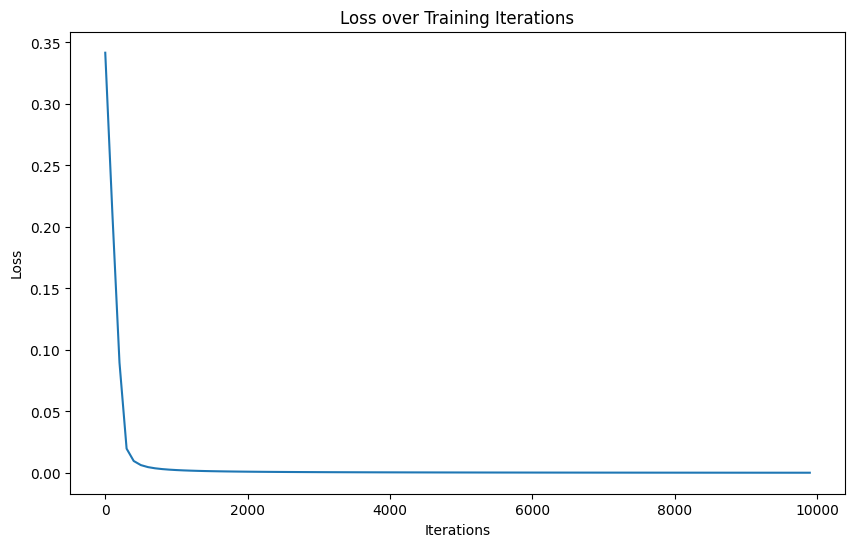

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(0, iterations, 100), loss_history)
plt.title('Loss over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 5. Test the Neural Network

In [7]:
nn.feedforward()
print("Input:")
print(X)
print("\nPredicted Output:")
print(nn.output)
print("\nActual Output:")
print(y)

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Predicted Output:
[[0.01992049]
 [0.98790254]
 [0.98654254]
 [0.00550436]]

Actual Output:
[[0]
 [1]
 [1]
 [0]]


## 6. Visualize the Decision Boundary

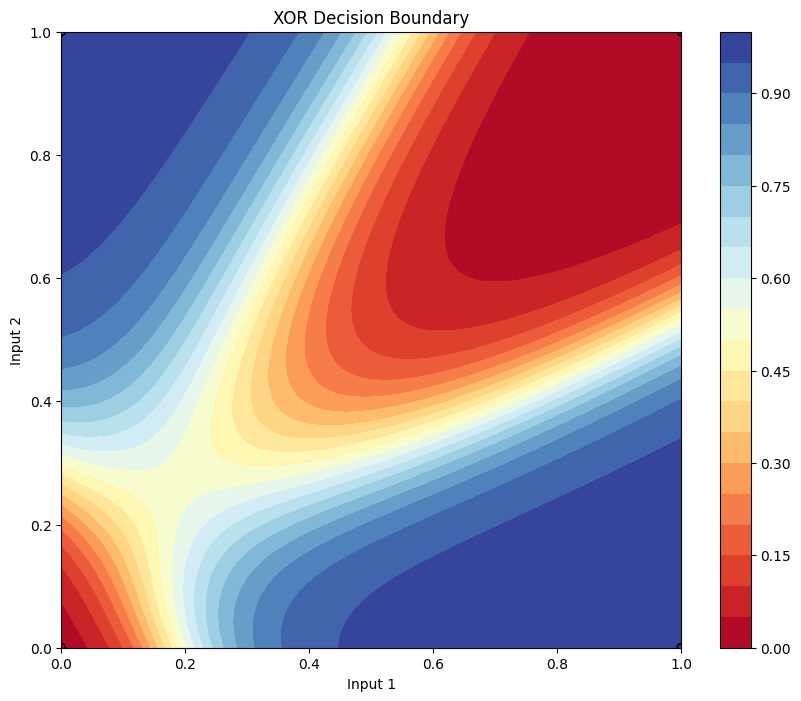

In [8]:
def make_predictions(x1, x2):
    inputs = np.array([[x1, x2]])
    layer1 = sigmoid(np.dot(inputs, nn.weights1))
    output = sigmoid(np.dot(layer1, nn.weights2))
    return output[0,0]

x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([make_predictions(x1, x2) for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
Z = Z.reshape(X1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, Z, levels=20, cmap='RdYlBu')
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='RdYlBu', edgecolors='black')
plt.title('XOR Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()

## Conclusion

We've successfully implemented a simple neural network to solve the XOR problem. 

The visualizations show how the network learns over time and how it separates the input space to make predictions. 

This example demonstrates the power of neural networks in solving non-linearly separable problems like XOR.